<a href="https://colab.research.google.com/github/Iamkoss/cis9650_flight_data/blob/main/fligh_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Flight Data from the Buffalo, NY Airport

### Author: Anna Bold, Kossi Gamli, Ran Xin Jiang, Christina Pratas
### Date : December 8th, 2025

## Executive Summary

## Table of Contents

1. Introduction
2. Problem Statement / Research Question
3. Data Description
4. Setup and Environment
5. Data Loading
6. Data Preparation
7. Model Planning
8. Model Building / Analysis
9. Discussion & Interpretation
10. Conclusion
11. References
12. Appendix

## Introduction
This projects examines flight records from Buffalo Niagara International Airport (BUF) for most of January 2025. The following 30 JSON files contain detailed information regarding flight schedules, scheduled arrival and departure times, airports, and aircraft information. The dataset shows how flights operated throughout the month, including patterns in delays, cancellations, airline performance, and schedule consistency. By organizing this raw data into a structured format, it highlights these trends and provides a clearer picture of BUF's activity during this period.

## Problem Statement / Research Question

The research question looks to find out what overlying issues the Buffalo Niagara International Airport may be having with the daily arriving and departing flights in January 2025. There are several different factors to look at, including potential problematic airlines, large discrepancies between scheduled departure/arrival times and actual departure/arrival times, and outlying flight cancellations.

The hypothesis will look to see if certain airlines, time of day, or gate placement within the airport have significance in potential delays or cancellations. The hypothesis will also look to see if any outside factors, such as inclement weather, may have resulted in delays or cancellations.

## Data Description

The data was presented in a series of 30 JSON files.

Combined, there were a total of 5509 rows of data and 46 columns of categories.

## Setup and Environment

In [21]:
!pip install google-cloud-storage

In [22]:
!git clone https://github.com/Iamkoss/cis9650_flight_data.git

fatal: destination path 'cis9650_flight_data' already exists and is not an empty directory.


In [23]:
from google.cloud import storage
from io import BytesIO
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import os
import glob
from google.cloud import storage
from io import BytesIO

## Data Loading

In [24]:
# Find all BUF json files
files = sorted(glob.glob("/content/cis9650_flight_data/BUF*.json"))

#checking to see if all the files were successful found:
print("Files found:", files)
print("Number of files found:", len(files))

# Store each file's data as a *separate* DataFrame
flight_dfs = {}  # dictionary: file_name → DataFrame

for file in files:
    print("Loading:", (file))

    with open(file, "r") as f:
        data = json.load(f)

    df = pd.json_normalize(data)

    # Save each DataFrame with name like "BUF_1"
    key = os.path.basename(file).replace(".json", "")
    flight_dfs[key] = df

#checking to see that all keys were loaded correctly
print("\nLoaded files (keys):", list(flight_dfs.keys()))
print("Number of DataFrames loaded:", len(flight_dfs))

###combine all dataframes together
if len(flight_dfs) > 0:
  df_all = pd.concat(flight_dfs.values(), ignore_index=True)
  print("Combined: ", df_all.shape)
  df_all.head()
else:
  print("No DataFrames to combine.")

Files found: ['/content/cis9650_flight_data/BUF_1.json', '/content/cis9650_flight_data/BUF_10.json', '/content/cis9650_flight_data/BUF_11.json', '/content/cis9650_flight_data/BUF_12.json', '/content/cis9650_flight_data/BUF_13.json', '/content/cis9650_flight_data/BUF_14.json', '/content/cis9650_flight_data/BUF_15.json', '/content/cis9650_flight_data/BUF_16.json', '/content/cis9650_flight_data/BUF_17.json', '/content/cis9650_flight_data/BUF_18.json', '/content/cis9650_flight_data/BUF_19.json', '/content/cis9650_flight_data/BUF_2.json', '/content/cis9650_flight_data/BUF_20.json', '/content/cis9650_flight_data/BUF_21.json', '/content/cis9650_flight_data/BUF_22.json', '/content/cis9650_flight_data/BUF_23.json', '/content/cis9650_flight_data/BUF_24.json', '/content/cis9650_flight_data/BUF_25.json', '/content/cis9650_flight_data/BUF_26.json', '/content/cis9650_flight_data/BUF_27.json', '/content/cis9650_flight_data/BUF_28.json', '/content/cis9650_flight_data/BUF_29.json', '/content/cis9650_fl

In [25]:
print(files)
print(len(files))

['/content/cis9650_flight_data/BUF_1.json', '/content/cis9650_flight_data/BUF_10.json', '/content/cis9650_flight_data/BUF_11.json', '/content/cis9650_flight_data/BUF_12.json', '/content/cis9650_flight_data/BUF_13.json', '/content/cis9650_flight_data/BUF_14.json', '/content/cis9650_flight_data/BUF_15.json', '/content/cis9650_flight_data/BUF_16.json', '/content/cis9650_flight_data/BUF_17.json', '/content/cis9650_flight_data/BUF_18.json', '/content/cis9650_flight_data/BUF_19.json', '/content/cis9650_flight_data/BUF_2.json', '/content/cis9650_flight_data/BUF_20.json', '/content/cis9650_flight_data/BUF_21.json', '/content/cis9650_flight_data/BUF_22.json', '/content/cis9650_flight_data/BUF_23.json', '/content/cis9650_flight_data/BUF_24.json', '/content/cis9650_flight_data/BUF_25.json', '/content/cis9650_flight_data/BUF_26.json', '/content/cis9650_flight_data/BUF_27.json', '/content/cis9650_flight_data/BUF_28.json', '/content/cis9650_flight_data/BUF_29.json', '/content/cis9650_flight_data/BUF

## Data Preparation

In [30]:
display(df)

,flight_date,flight_status,aircraft,live,departure.airport,departure.timezone,departure.iata,departure.icao,departure.terminal,departure.gate,...,flight.codeshared.airline_iata,flight.codeshared.airline_icao,flight.codeshared.flight_number,flight.codeshared.flight_iata,flight.codeshared.flight_icao,flight.codeshared,aircraft.registration,aircraft.iata,aircraft.icao,aircraft.icao24
0,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,4,...,aa,aal,5312,aa5312,aal5312,NaN,NaN,NaN,NaN,NaN
1,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,4,...,NaN,NaN,NaN,NaN,NaN,NaN,N516AE,CRJ7,CRJ7,A677BE
2,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,5,...,NaN,NaN,NaN,NaN,NaN,NaN,N129AA,A321,A321,A07522
3,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,2A,...,NaN,NaN,NaN,NaN,NaN,NaN,N652RS,E145,E145,A895B0
4,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,8,...,b6,jbu,141,b6141,jbu141,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,7,...,b6,jbu,2001,b62001,jbu2001,NaN,NaN,NaN,NaN,NaN
169,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,N473UP,B752,B752,A5CE0F
170,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,2025-01-28,landed,NaN,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#clean up the entire data set (ie. fix the naming of some columns)

#making a copy of the master set (in case of mess up)
df = df_all.copy()
#replacting the column names from . to a _ for easier reading
df.columns = df.columns.str.lower().str.replace('.', '_')

#remove any duplicates from main set
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)

df.head(10)




After dropping duplicates: (5509, 46)


,flight_date,flight_status,live,departure_airport,departure_timezone,departure_iata,departure_icao,departure_terminal,departure_gate,departure_delay,...,aircraft_iata,aircraft_icao,aircraft_icao24,aircraft,flight_codeshared_airline_name,flight_codeshared_airline_iata,flight_codeshared_airline_icao,flight_codeshared_flight_number,flight_codeshared_flight_iata,flight_codeshared_flight_icao
0,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,15,20.0,...,B38M,B38M,AC2C10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,None,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,11,38.0,...,NaN,NaN,NaN,NaN,american airlines,aa,aal,5163,aa5163,aal5163
3,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,11,38.0,...,CRJ7,CRJ7,A6BF4E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,16,4.0,...,B38M,B38M,AC4CA8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,5,17.0,...,A321,A321,A13C73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,4,43.0,...,E75L,E75L,A5255A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,20,45.0,...,E170,E170,AB1D06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,12,57.0,...,B739,B739,A923EF,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,None,18,4.0,...,B737,B737,AD36A8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#convert the date and time columns to datetime

# Convert main flight date
df['flight_date'] = pd.to_datetime(df['flight_date'], errors='coerce')

# List of time columns to convert
time_columns = [
    'departure_scheduled', 'departure_estimated', 'departure_actual',
    'arrival_scheduled', 'arrival_estimated', 'arrival_actual'
]

# Convert each to datetime
for col in time_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

df[['flight_date', 'departure_scheduled', 'departure_actual', 'arrival_scheduled', 'arrival_actual']].head()

,flight_date,departure_scheduled,departure_actual,arrival_scheduled,arrival_actual
0,2025-01-05,2025-01-05 05:00:00+00:00,2025-01-05 05:20:00+00:00,2025-01-05 07:50:00+00:00,2025-01-05 07:33:00+00:00
1,2025-01-05,2025-01-05 00:00:00+00:00,NaT,2025-01-05 01:04:00+00:00,NaT
2,2025-01-05,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00
3,2025-01-05,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00
4,2025-01-05,2025-01-05 05:25:00+00:00,2025-01-05 05:28:00+00:00,2025-01-05 06:40:00+00:00,2025-01-05 06:15:00+00:00


In [33]:
#calculate delay time in minutes

# Departure delay in minutes
df['dep_delay_min'] = (
    (df['departure_actual'] - df['departure_scheduled'])
    .dt.total_seconds() / 60
)

# Arrival delay in minutes
df['arr_delay_min'] = (
    (df['arrival_actual'] - df['arrival_scheduled'])
    .dt.total_seconds() / 60
)

print("the negative value means the flight either arrived/departed early.")

df[['departure_scheduled', 'departure_actual', 'dep_delay_min',
    'arrival_scheduled', 'arrival_actual', 'arr_delay_min']].head()

the negative value means the flight either arrived/departed early.


,departure_scheduled,departure_actual,dep_delay_min,arrival_scheduled,arrival_actual,arr_delay_min
0,2025-01-05 05:00:00+00:00,2025-01-05 05:20:00+00:00,20.0,2025-01-05 07:50:00+00:00,2025-01-05 07:33:00+00:00,-17.0
1,2025-01-05 00:00:00+00:00,NaT,NaN,2025-01-05 01:04:00+00:00,NaT,NaN
2,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,37.0,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00,-4.0
3,2025-01-05 05:23:00+00:00,2025-01-05 06:00:00+00:00,37.0,2025-01-05 06:51:00+00:00,2025-01-05 06:47:00+00:00,-4.0
4,2025-01-05 05:25:00+00:00,2025-01-05 05:28:00+00:00,3.0,2025-01-05 06:40:00+00:00,2025-01-05 06:15:00+00:00,-25.0


In [34]:
#handle missing values:

#  fill in missing gate terminal/gate information
df['departure_terminal'] = df['departure_terminal'].fillna("Unknown")
df['departure_gate'] = df['departure_gate'].fillna("Unknown")

# Drop flights missing flight_status (dropping flihts that do not have a flight states; prob will not happen, but checking in case)
df = df.dropna(subset=['flight_status'])


print("Cleaned up missing info. shows that there are 697 flights that have missing departing_delay info, 1364 have missing departure_actual info.")
df.isna().sum().head(15)


Cleaned up missing info. shows that there are 697 flights that have missing departing_delay info, 1364 have missing departure_actual info.


,0
flight_date,0
flight_status,0
live,5509
departure_airport,0
departure_timezone,0
departure_iata,0
departure_icao,0
departure_terminal,0
departure_gate,0
departure_delay,697


In [35]:
#adding a flag (true/false) if a flight was cancelled so we can use it to analyze cancellation rates

#marks either true or false
df['is_cancelled'] = df['flight_status'].eq('cancelled')

print("Cancellation flag created.")
df[['flight_status', 'is_cancelled']].head(100)

Cancellation flag created.


,flight_status,is_cancelled
0,landed,False
1,landed,False
2,landed,False
3,landed,False
4,landed,False
...,...,...
95,landed,False
96,landed,False
97,landed,False
98,landed,False


In [36]:
display(df)

,flight_date,flight_status,live,departure_airport,departure_timezone,departure_iata,departure_icao,departure_terminal,departure_gate,departure_delay,...,aircraft,flight_codeshared_airline_name,flight_codeshared_airline_iata,flight_codeshared_airline_icao,flight_codeshared_flight_number,flight_codeshared_flight_iata,flight_codeshared_flight_icao,dep_delay_min,arr_delay_min,is_cancelled
0,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,15,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,-17.0,False
1,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,Unknown,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,11,38.0,...,NaN,american airlines,aa,aal,5163,aa5163,aal5163,37.0,-4.0,False
3,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,11,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,-4.0,False
4,2025-01-05,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,16,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,-25.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5504,2025-01-28,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,7,41.0,...,NaN,jetblue airways,b6,jbu,2001,b62001,jbu2001,40.0,NaN,False
5505,2025-01-28,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,Unknown,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,6.0,False
5506,2025-01-28,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,Unknown,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5507,2025-01-28,landed,None,Buffalo Niagara International,America/New_York,BUF,KBUF,Unknown,Unknown,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


## Model Planning

In [45]:
#overview of entire data set
total_flights = len(df)
total_cancelled = df['is_cancelled'].sum()

# Delayed = actual departure or arrival time does NOT match scheduled time (and not cancelled)
total_delayed = df[(~df['is_cancelled']) & (df['is_delayed_exact'])].shape[0]

num_airlines = df['airline_name'].nunique()

print("---- BUF Airport Flight Summary ----")
print(f"Total flights: {total_flights}")
print(f"Total cancelled flights: {total_cancelled} ({(total_cancelled/total_flights)*100:.2f}%)")
print(f"Total delayed flights (non-cancelled, actual ≠ scheduled): {total_delayed} ({(total_delayed/total_flights)*100:.2f}%)")
print(f"Number of airlines: {num_airlines}")

df[['airline_name', 'flight_status', 'dep_delay_min', 'arr_delay_min']].head()

KeyError: 'is_delayed_exact'

In [41]:
# Overview of cancellation info

total_flights = len(df)
total_cancelled = df['is_cancelled'].sum()
cancel_rate = (total_cancelled / total_flights) * 100
num_airlines = df['airline_name'].nunique()

print("---- BUF Airport Cancellation Summary ----")
print(f"Total flights: {total_flights}")
print(f"Total cancelled flights: {total_cancelled} ({cancel_rate:.2f}%)")
print(f"Number of airlines: {num_airlines}")

# Quick peek at flight status
display(df[['airline_name', 'flight_status']].head())

# ------- Cancellations by airline ----------

cancel_by_airline = (
    df.groupby('airline_name')['is_cancelled']
    .mean()
    .sort_values(ascending=False) * 100
)

print("\n---- Cancellation Rate by Airline (% cancelled) ----")
display(cancel_by_airline)

# number of cancelled flights by airline
cancel_counts = df.groupby('airline_name')['is_cancelled'].sum().sort_values(ascending=False)
print("\n---- Number of Cancelled Flights by Airline ----")
display(cancel_counts)

# -------- Cancellations by date (can be related to weather) ----------

cancel_by_date = df.groupby('flight_date')['is_cancelled'].mean() * 100

print("\n---- Top 10 Dates by Cancellation Rate (% cancelled) ----")
display(cancel_by_date.sort_values(ascending=False).head(10))


---- BUF Airport Cancellation Summary ----
Total flights: 5509
Total cancelled flights: 53 (0.96%)
Number of airlines: 106


,airline_name,flight_status
0,Southwest Airlines,landed
1,empty,landed
2,AlphaSky,landed
3,American Airlines,landed
4,Southwest Airlines,landed



---- Cancellation Rate by Airline (% cancelled) ----


,is_cancelled
airline_name,
Emirates,6.666667
Copa Airlines,3.773585
Volaris,3.703704
SA AVIANCA,3.488372
Brussels Airlines,3.333333
...,...
Ventura,0.000000
Wheels Up,0.000000
Zenflight,0.000000



---- Number of Cancelled Flights by Airline ----


,is_cancelled
airline_name,
American Airlines,8
United Airlines,8
Copa Airlines,4
AlphaSky,4
SA AVIANCA,3
...,...
Ventura,0
Wheels Up,0
Zenflight,0



---- Top 10 Dates by Cancellation Rate (% cancelled) ----


,is_cancelled
flight_date,
2025-01-06,9.047619
2025-01-22,4.891304
2025-01-19,4.265403
2025-01-07,2.777778
2025-01-10,2.577320
2025-01-11,1.621622
2025-01-21,0.555556
2025-01-13,0.526316
2025-01-03,0.512821


In [ ]:
# ---------------------------------------
# Delay Analysis Overview
# ---------------------------------------

# 1) Numeric delay summary (minutes) for flights that actually departed
#    (exclude cancelled + missing actual departure times)

df_departed = df[(df['is_cancelled'] == False) & (df['dep_delay_min'].notna())]

print("Flights that actually departed (with dep delay data):", len(df_departed))
display(df_departed.head())

# Extract delay columns from df_departed
dep_delays = df_departed['dep_delay_min']
arr_delays = df_departed['arr_delay_min']

print("\n---- Departure Delay (Minutes) ----")
print(f"Number of departed flights with delay data: {len(dep_delays)}")
print(f"Average departure delay: {dep_delays.mean():.2f} min")
print(f"Median departure delay: {dep_delays.median():.2f} min")
print(f"90th percentile departure delay: {dep_delays.quantile(0.90):.2f} min")

print("\n---- Arrival Delay (Minutes) ----")
print(f"Number of flights with arrival delay data: {len(arr_delays)}")
print(f"Average arrival delay: {arr_delays.mean():.2f} min")
print(f"Median arrival delay: {arr_delays.median():.2f} min")
print(f"90th percentile arrival delay: {arr_delays.quantile(0.90):.2f} min")

# 2) Define "delayed" using your chosen rule:
#    A flight is delayed if actual departure OR arrival time != scheduled

df['is_delayed_exact'] = (
    (df['departure_actual'] != df['departure_scheduled']) |
    (df['arrival_actual'] != df['arrival_scheduled'])
)

# Percentage of delayed flights (based on exact time mismatch)
num_delayed = df['is_delayed_exact'].sum()
total_flights = len(df)
percent_delayed = (num_delayed / total_flights) * 100

print("\n---- Delay Summary (Exact Match Definition) ----")
print(f"Total flights: {total_flights}")
print(f"Delayed flights (actual ≠ scheduled): {num_delayed}")
print(f"Percentage delayed: {percent_delayed:.2f}%")

# Show first few delayed flights with their time differences
display(df[df['is_delayed_exact']][[
    'airline_name',
    'flight_iata',
    'departure_scheduled',
    'departure_actual',
    'arrival_scheduled',
    'arrival_actual'
]].head())

# 3) Delays by airline (using is_delayed_exact)

airline_delay_stats = df.groupby('airline_name').agg(
    total_flights=('airline_name', 'count'),
    delayed_flights=('is_delayed_exact', 'sum')
)

airline_delay_stats['delay_rate (%)'] = (
    airline_delay_stats['delayed_flights'] /
    airline_delay_stats['total_flights'] * 100
)

airline_delay_stats = airline_delay_stats.sort_values('delay_rate (%)', ascending=False)

print("\n---- Delay Rate by Airline (Actual ≠ Scheduled) ----")
display(airline_delay_stats)

# 4) Delays by specific days (helpful for potential weather impact)

daily_delay_stats = df.groupby('flight_date').agg(
    total_flights=('flight_date', 'count'),
    delayed_flights=('is_delayed_exact', 'sum')
)

daily_delay_stats['delay_rate (%)'] = (
    daily_delay_stats['delayed_flights'] /
    daily_delay_stats['total_flights'] * 100
)

print("\n---- Top 10 Days by Delay Rate ----")
display(daily_delay_stats.sort_values('delay_rate (%)', ascending=False).head(10))

In [ ]:
#time of day (monring/midday/night) delay

# Extract hour from actual departure time
df['departure_hour'] = df['departure_actual'].dt.hour

def get_time_of_day(hour):
    if pd.isna(hour):
        return "Unknown"
    elif 0 <= hour < 6:
        return "Night (0–5)"
    elif 6 <= hour < 12:
        return "Morning (6–11)"
    elif 12 <= hour < 18:
        return "Afternoon (12–17)"
    else:
        return "Evening (18–23)"

df['time_of_day'] = df['departure_hour'].apply(get_time_of_day)

time_of_day_stats = df.groupby('time_of_day').agg(
    total_flights=('time_of_day', 'count'),
    delayed_flights=('is_delayed_exact', 'sum')
)

time_of_day_stats['delay_rate (%)'] = (
    time_of_day_stats['delayed_flights'] /
    time_of_day_stats['total_flights'] * 100
)

display(time_of_day_stats.sort_values('delay_rate (%)', ascending=False))

In [ ]:
#delays based on gate/teminal used:

#---- TERMINAL PERFORMANCE ---- (note that all files have NULL for their terminal)


# Only consider flights that actually departed (not cancelled)
df_terminal = df[(df['is_cancelled'] == False) & (df['dep_delay_min'].notna())]

terminal_stats = df_terminal.groupby('departure_terminal').agg(
    total_flights=('dep_delay_min', 'count'),
    avg_dep_delay=('dep_delay_min', 'mean'),
    med_dep_delay=('dep_delay_min', 'median'),
)

# Add cancellation rate for each terminal
terminal_cancel_rate = (
    df.groupby('departure_terminal')['is_cancelled']
    .mean() * 100
)

terminal_stats['cancel_rate (%)'] = terminal_cancel_rate

# Final sorted table (worst-performing first)
terminal_stats = terminal_stats.sort_values('avg_dep_delay', ascending=False)

print("=== Terminal Performance (Delays & Cancellations) ===")
display(terminal_stats)



# ---- GATE PERFORMANCE ----

df_gate = df[(df['is_cancelled'] == False) & (df['dep_delay_min'].notna())]

gate_stats = df_gate.groupby('departure_gate').agg(
    total_flights=('dep_delay_min', 'count'),
    avg_dep_delay=('dep_delay_min', 'mean'),
    med_dep_delay=('dep_delay_min', 'median'),
)

gate_cancel_rate = (
    df.groupby('departure_gate')['is_cancelled']
    .mean() * 100
)

gate_stats['cancel_rate (%)'] = gate_cancel_rate

# Sort by worst delay
gate_stats = gate_stats.sort_values('avg_dep_delay', ascending=False)

print("=== Gate Performance (Delays & Cancellations) ===")
display(gate_stats.head(20))  # show top 20 worst gates

In [43]:
#destination performcance (seeing if certain destinations had a higher delay time)

# ---- DESTINATION PERFORMANCE ----

# Only flights that have a destination airport
df_dest = df.copy()

# Group by arrival airport (destination)
dest_stats = df_dest.groupby('arrival_airport').agg(
    total_flights=('flight_status', 'count'),
    avg_dep_delay=('dep_delay_min', 'mean'),
    avg_arr_delay=('arr_delay_min', 'mean'),
    cancellations=('is_cancelled', 'sum'),
    cancel_rate=('is_cancelled', 'mean'),
)

# Convert cancel_rate to %
dest_stats['cancel_rate'] = dest_stats['cancel_rate'] * 100

# Sort by worst arrival delay
dest_stats_sorted = dest_stats.sort_values('avg_arr_delay', ascending=False)

print("=== Destination Performance (Sorted by Arrival Delay) ===")
display(dest_stats_sorted.head(15))   # Show top 15 worst destinations


worst_arrivals = dest_stats.sort_values('avg_arr_delay', ascending=False).head(10)
print("=== Top 10 Worst Destinations by Arrival Delay ===")
display(worst_arrivals)


worst_cancel_routes = dest_stats.sort_values('cancel_rate', ascending=False).head(10)
print("=== Top 10 Destinations with Highest Cancellation Rate ===")
display(worst_cancel_routes)


=== Destination Performance (Sorted by Arrival Delay) ===


,total_flights,avg_dep_delay,avg_arr_delay,cancellations,cancel_rate
arrival_airport,,,,,
Atlantic City International,2,5.500000,42.000000,0,0.0
Mineta San Jose International Airport,1,35.000000,26.000000,0,0.0
Lambert-St. Louis International,2,24.000000,26.000000,0,0.0
Buffalo Niagara International,3,29.500000,20.000000,0,0.0
Pittsburgh International,5,66.500000,14.000000,1,20.0
Elmira Corning Regional,18,30.375000,12.200000,0,0.0
Richmond International Airport,3,18.000000,10.500000,0,0.0
Love Field,5,3.500000,9.000000,0,0.0
Los Angeles International,10,39.600000,8.800000,0,0.0


=== Top 10 Worst Destinations by Arrival Delay ===


,total_flights,avg_dep_delay,avg_arr_delay,cancellations,cancel_rate
arrival_airport,,,,,
Atlantic City International,2,5.500,42.0,0,0.0
Mineta San Jose International Airport,1,35.000,26.0,0,0.0
Lambert-St. Louis International,2,24.000,26.0,0,0.0
Buffalo Niagara International,3,29.500,20.0,0,0.0
Pittsburgh International,5,66.500,14.0,1,20.0
Elmira Corning Regional,18,30.375,12.2,0,0.0
Richmond International Airport,3,18.000,10.5,0,0.0
Love Field,5,3.500,9.0,0,0.0
Los Angeles International,10,39.600,8.8,0,0.0


=== Top 10 Destinations with Highest Cancellation Rate ===


,total_flights,avg_dep_delay,avg_arr_delay,cancellations,cancel_rate
arrival_airport,,,,,
T. F. Green Airport,4,17.500000,-6.500000,1,25.000000
Pittsburgh International,5,66.500000,14.000000,1,20.000000
Ronald Reagan Washington National Airport,163,30.773196,-3.254902,10,6.134969
Washington Dulles International,287,37.561983,-5.037037,14,4.878049
Baltimore/Washington International Thurgood Marshall,125,17.582524,-11.957447,3,2.400000
Hartsfield-jackson Atlanta International,557,30.948454,-5.199074,12,2.154399
Chicago O'hare International,585,27.925439,-19.685393,7,1.196581
Charlotte Douglas,91,23.000000,-14.030303,1,1.098901
Newark Liberty International,185,24.173333,-19.816092,2,1.081081


## Model building / Analysis

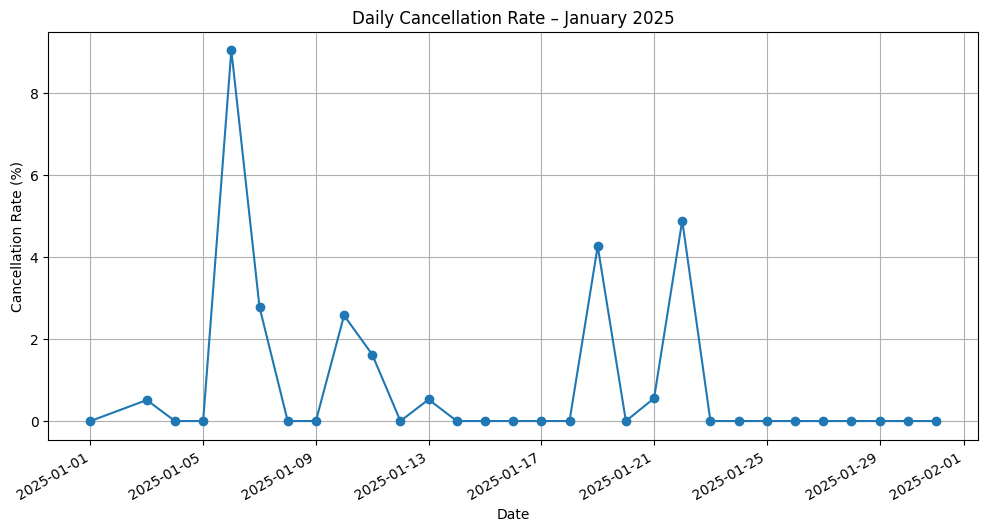

In [42]:
#cancellations by date in Jan:



plt.figure(figsize=(12,6))
cancel_by_date.plot(marker='o')
plt.title('Daily Cancellation Rate – January 2025')
plt.xlabel('Date')
plt.ylabel('Cancellation Rate (%)')
plt.grid(True)
plt.show()

In [ ]:

#line chart displaying time of day delays:





In [ ]:
#chart for gate delay:


top_gates = gate_stats.head(15)

plt.figure(figsize=(12,6))
plt.bar(top_gates.index, top_gates['avg_dep_delay'])
plt.title("Top 15 Gates by Average Departure Delay")
plt.xlabel("Gate")
plt.ylabel("Avg Delay (min)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


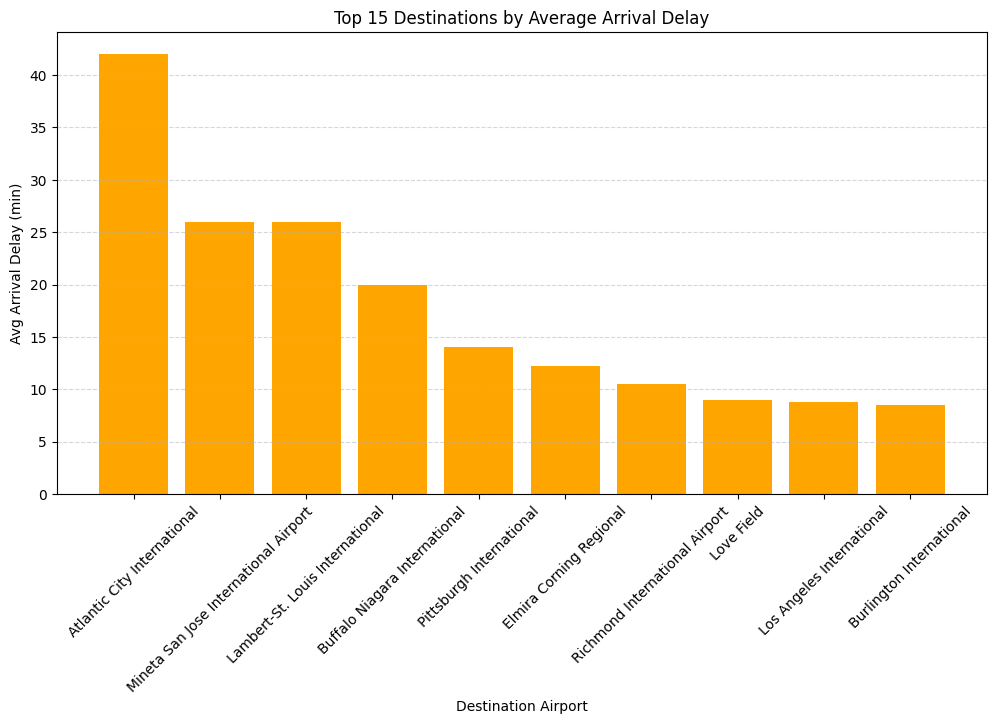

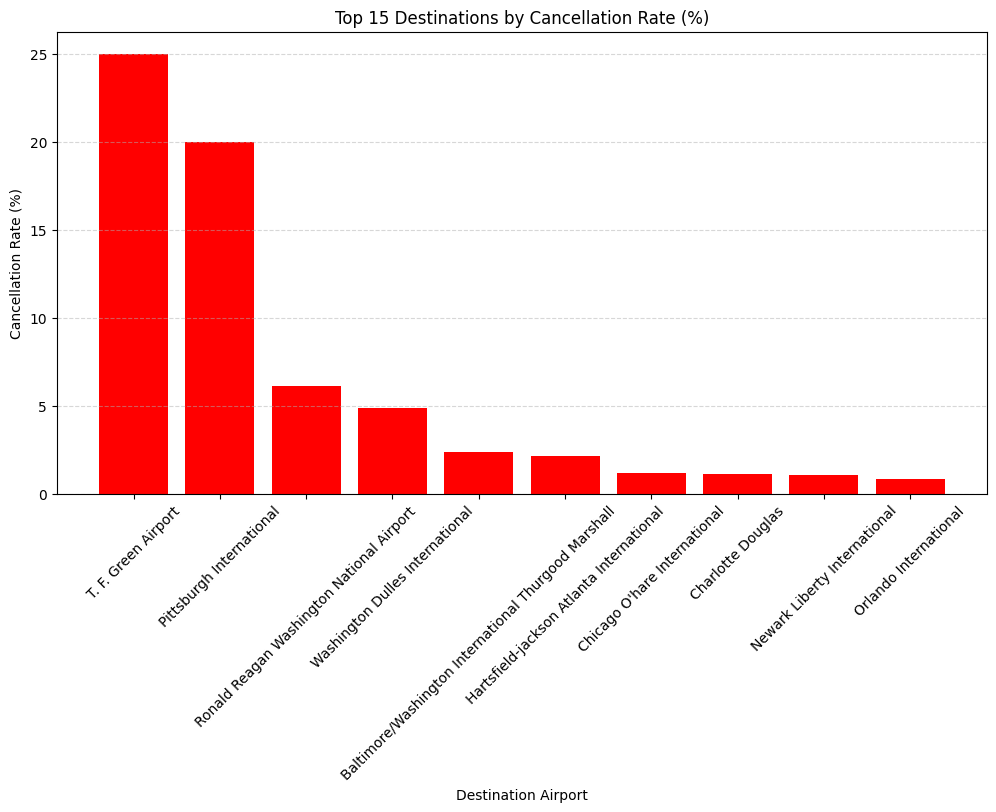

In [44]:
#array delay by destination

top15_dest = worst_arrivals.head(15)

plt.figure(figsize=(12,6))
plt.bar(top15_dest.index, top15_dest['avg_arr_delay'], color='orange')
plt.title("Top 15 Destinations by Average Arrival Delay")
plt.xlabel("Destination Airport")
plt.ylabel("Avg Arrival Delay (min)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



#cancellation rate by destination:

top15_cancel = worst_cancel_routes.head(15)

plt.figure(figsize=(12,6))
plt.bar(top15_cancel.index, top15_cancel['cancel_rate'], color='red')
plt.title("Top 15 Destinations by Cancellation Rate (%)")
plt.xlabel("Destination Airport")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



## Discussion and Results

In regards to cancelled flights, we found that there were not as many cancelled flights as expected. The days with the most cancelled flights line up with inclement weather in Buffalo: January 6, 2025 had a snowstorm, and January 22, 2025 had a large freeze (Reference 2). Thus we conclude that cancellations are most significantly weather related.

Note: From class: What did we find in the data
You could also put where you're stuck and want to do more analysis.

## Conclusion

## References

1. https://www.geeksforgeeks.org/python/line-chart-in-matplotlib-python/

2. https://weatherspark.com/h/m/20372/2025/1/Historical-Weather-in-January-2025-in-Buffalo-New-York-United-States


## Appendix